In [1]:
#importing Python packages 
import pandas as pd
import numpy as np
import matplotlib as mp
get_ipython().run_line_magic('matplotlib', 'inline')
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

In [2]:
# Importing time series data from the local drive through creating dataframes 
# (the original source: https://www.gapminder.org/data/)
# The economic time series data is on GDP, Gini index and Billionaires per 1M population for countries across the world   
gdp_df = pd.read_csv(r'/Users/ainurartay/Desktop/DAND/project2/data (gapminder)/gdppercapita_us_inflation_adjusted.csv')
gini_df = pd.read_csv(r'/Users/ainurartay/Desktop/DAND/project2/data (gapminder)/gini.csv')
bln_df = pd.read_csv(r'/Users/ainurartay/Desktop/DAND/project2/data (gapminder)/dollar_billionaires_per_million_people.csv')

In [3]:
# We start exploring the data by viewing the contents (structure, time range) of the dataframes using .head() function 
gdp_df.head()

,country,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,445.0,525.0,553,569.0,630.0,634.0,630.0,620.0,618.0,618.0
1,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3780.0,3930.0,4090,4210.0,4280.0,4330.0,4410.0,4520.0,4680.0,4870.0
2,Algeria,2470.0,2080.0,1630.0,2130.0,2200.0,2280.0,2110.0,2240.0,2410.0,...,4390.0,4390.0,4460,4500.0,4560.0,4600.0,4680.0,4760.0,4830.0,4830.0
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,43900.0,42000.0,39700,38200.0,38200.0,39100.0,40800.0,41800.0,43000.0,43900.0
4,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3580.0,3540.0,3530,3540.0,3590.0,3710.0,3750.0,3730.0,3580.0,3480.0


In [4]:
gini_df.head()


,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040
0,Afghanistan,30.5,30.5,30.5,30.5,30.5,30.5,30.5,30.5,30.5,...,36.8,36.8,36.8,36.8,36.8,36.8,36.8,36.8,36.8,36.8
1,Albania,38.9,38.9,38.9,38.9,38.9,38.9,38.9,38.9,38.9,...,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0
2,Algeria,56.2,56.2,56.2,56.2,56.2,56.2,56.2,56.2,56.2,...,27.6,27.6,27.6,27.6,27.6,27.6,27.6,27.6,27.6,27.6
3,Andorra,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,...,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0
4,Angola,57.2,57.2,57.2,57.2,57.2,57.2,57.2,57.2,57.2,...,42.6,42.6,42.6,42.6,42.6,42.6,42.6,42.6,42.6,42.6


In [5]:
bln_df.head()

,country,2004,2005,2006,2007
0,Argentina,0.0255,0.0253,0.0250,0.0248
1,Australia,0.2510,0.2990,0.3450,0.5870
2,Austria,0.3670,0.4890,0.3660,0.3660
3,Belgium,0.0966,0.0965,0.1930,0.1930
4,Brazil,0.0326,0.0430,0.0851,0.1050


In [6]:
#Exploring the data for completeness (nulls) and data types 
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 59 columns):
country    190 non-null object
1960       88 non-null float64
1961       89 non-null float64
1962       89 non-null float64
1963       89 non-null float64
1964       89 non-null float64
1965       93 non-null float64
1966       96 non-null float64
1967       97 non-null float64
1968       99 non-null float64
1969       99 non-null float64
1970       108 non-null float64
1971       108 non-null float64
1972       108 non-null float64
1973       108 non-null float64
1974       110 non-null float64
1975       114 non-null float64
1976       115 non-null float64
1977       120 non-null float64
1978       120 non-null float64
1979       121 non-null float64
1980       132 non-null float64
1981       136 non-null float64
1982       138 non-null float64
1983       138 non-null float64
1984       140 non-null float64
1985       141 non-null float64
1986       144 non-null float64
1987      

In [7]:
#checking the completeness of the data
gdp_df.isnull().sum()

country      0
1960       102
1961       101
1962       101
1963       101
1964       101
1965        97
1966        94
1967        93
1968        91
1969        91
1970        82
1971        82
1972        82
1973        82
1974        80
1975        76
1976        75
1977        70
1978        70
1979        69
1980        58
1981        54
1982        52
1983        52
1984        50
1985        49
1986        46
1987        43
1988        41
1989        40
1990        29
1991        28
1992        26
1993        25
1994        23
1995        14
1996        12
1997        10
1998        10
1999         9
2000         6
2001         5
2002         4
2003         4
2004         4
2005         4
2006         4
2007         3
2008         3
2009         3
2010         0
2011         3
2012         4
2013         4
2014         4
2015         5
2016         6
2017         7
dtype: int64

In [8]:
# Creating a new (sub) data frame with selected 4 countries (China, South Korea, United States, Venezuela). 
# "_mod" in the name of the data frame stands for "modified"  
gdp_mod = gdp_df.loc[[35, 155, 181, 185], :]

In [9]:
# Checking if the new data farme captures the right countires
gdp_mod

,country,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
35,China,192.0,141.0,132.0,142.0,164.0,187.0,202.0,185.0,173.0,...,3810.0,4140.0,4560,4970.0,5340.0,5720.0,6110.0,6500.0,6890.0,7330.0
155,South Korea,944.0,980.0,989.0,1050.0,1120.0,1170.0,1280.0,1360.0,1510.0,...,20800.0,20800.0,22100,22700.0,23100.0,23700.0,24300.0,24900.0,25500.0,26200.0
181,United States,17000.0,17100.0,17900.0,18400.0,19200.0,20200.0,21300.0,21600.0,22400.0,...,49400.0,47600.0,48400,48800.0,49500.0,50000.0,50900.0,51900.0,52300.0,53100.0
185,Venezuela,12400.0,12400.0,12900.0,12900.0,13800.0,13900.0,13600.0,13500.0,14100.0,...,14700.0,14000.0,13500,13900.0,14500.0,14500.0,13700.0,NaN,NaN,NaN


In [10]:
# Doing the same for the 2 other data frames and limiting the time range for 1960-2017 as in the gdp_mod dataframe
gini_mod = gini_df.loc[[35, 158, 186, 190], '1960' :'2017']

In [11]:
# Checking the new dataframe
gini_mod

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
35,25.3,25.1,24.9,24.7,24.5,24.3,24.1,23.9,23.6,23.4,...,42.3,42.5,42.5,41.9,41.3,40.6,40.0,39.4,39.2,39.1
158,31.5,31.7,31.9,32.1,32.4,32.6,32.8,33.0,33.3,33.7,...,32.0,32.1,32.0,31.8,31.7,31.6,31.6,31.6,31.6,31.6
186,34.7,34.6,34.4,34.3,34.1,33.9,33.7,33.5,33.4,33.1,...,40.8,40.7,40.7,40.7,40.8,41.0,41.2,41.3,41.4,41.5
190,63.1,63.4,63.7,64.2,64.8,65.3,65.9,66.5,67.1,67.5,...,46.9,46.9,46.9,46.9,46.9,46.9,46.9,46.9,46.9,46.9


In [12]:
# For convenience, I am transposing the dataframe. This transposed frame will be used to plot a graph.
# "_t" in the name stands for "transposed"
gdp_mod_t=gdp_mod.transpose() 

In [13]:
# Checking the transposed dataframe
gdp_mod_t

,35,155,181,185
country,China,South Korea,United States,Venezuela
1960,192,944,17000,12400
1961,141,980,17100,12400
1962,132,989,17900,12900
1963,142,1050,18400,12900
1964,164,1120,19200,13800
1965,187,1170,20200,13900
1966,202,1280,21300,13600
1967,185,1360,21600,13500
1968,173,1510,22400,14100


In [14]:
# Moving the first row with names of the countries as column names (next 3 lines of code)
new_header = gdp_mod_t.iloc[0]

In [15]:
gpd_mod_t=gdp_mod_t[1:]

In [16]:
gdp_mod_t.columns=new_header

In [17]:
# Deleting the first row with the country names and the last 3 rows with null values for Venezuela 
gdp_mod_t.drop(['country', '2015', '2016', '2017'], inplace=True)

In [18]:
# Checking the result
gdp_mod_t

country,China,South Korea,United States,Venezuela
1960,192,944,17000,12400
1961,141,980,17100,12400
1962,132,989,17900,12900
1963,142,1050,18400,12900
1964,164,1120,19200,13800
1965,187,1170,20200,13900
1966,202,1280,21300,13600
1967,185,1360,21600,13500
1968,173,1510,22400,14100
1969,197,1690,22900,13700


In [19]:
# Similar manipulation for Gini index and Billionaires per 1M population
gini_mod_t=gini_mod.transpose()

In [20]:
# Renameing the column names from indeces to country names 
gini_mod_t.rename(columns={35:'China', 158:'South Korea', 186:'United States', 190:'Venezuela'}, inplace=True)

In [21]:
gini_mod_t

,China,South Korea,United States,Venezuela
1960,25.3,31.5,34.7,63.1
1961,25.1,31.7,34.6,63.4
1962,24.9,31.9,34.4,63.7
1963,24.7,32.1,34.3,64.2
1964,24.5,32.4,34.1,64.8
1965,24.3,32.6,33.9,65.3
1966,24.1,32.8,33.7,65.9
1967,23.9,33.0,33.5,66.5
1968,23.6,33.3,33.4,67.1
1969,23.4,33.7,33.1,67.5


In [22]:
# For comparability, dropping the last 3 years from the data frame 
gini_mod_t.drop(['2015','2016','2017'])

,China,South Korea,United States,Venezuela
1960,25.3,31.5,34.7,63.1
1961,25.1,31.7,34.6,63.4
1962,24.9,31.9,34.4,63.7
1963,24.7,32.1,34.3,64.2
1964,24.5,32.4,34.1,64.8
1965,24.3,32.6,33.9,65.3
1966,24.1,32.8,33.7,65.9
1967,23.9,33.0,33.5,66.5
1968,23.6,33.3,33.4,67.1
1969,23.4,33.7,33.1,67.5


In [23]:
# Checking info in the new data frame
gdp_mod_t.info()

<class 'pandas.core.frame.DataFrame'>
Index: 55 entries, 1960 to 2014
Data columns (total 4 columns):
China            55 non-null object
South Korea      55 non-null object
United States    55 non-null object
Venezuela        55 non-null object
dtypes: object(4)
memory usage: 2.1+ KB


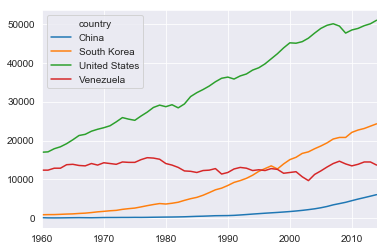

In [24]:
# Plotting line graphs for 4 countries to see the GDP trends.
# Upward movement for all except for Venezuela  
gdp_mod_t.plot()

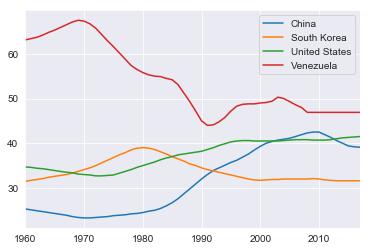

In [25]:
# Visualizing Gini index trends 
gini_mod_t.plot()

In [26]:
# Manipulating the data on billionaires per 1M population -- selecting the 4 countires into a new dataframe 
# and transposing the dataframe
bln_mod_t=(bln_df.loc[[7, 43, 52, 53], :]).transpose()

In [27]:
# Checking the dataframe
bln_mod_t

,7,43,52,53
country,China,South Korea,United States,Venezuela
2004,0.00077,0.0413,0.945,0.0799
2005,0.00153,0.0617,1.15,0.0788
2006,0.0061,0.0819,1.24,0.0777
2007,0.0152,0.204,1.38,0.0767


In [28]:
# Renaming the column names from indeces to appropriate country names 
bln_mod_t.columns=['China', 'South Korea', 'United States', 'Venezuela']

In [29]:
# Dropping the first row (non-numerical)
bln_mod_t=bln_mod_t.drop('country')

In [30]:
# Checking the new dataframe
bln_mod_t.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, 2004 to 2007
Data columns (total 4 columns):
China            4 non-null object
South Korea      4 non-null object
United States    4 non-null object
Venezuela        4 non-null object
dtypes: object(4)
memory usage: 160.0+ bytes


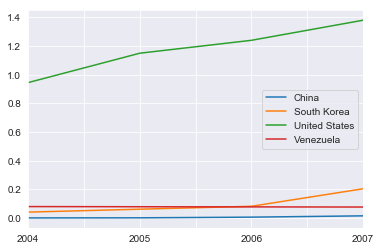

In [31]:
# Visualizing the data on billionaires per 1M population
bln_mod_t.plot()